# <img style="float: left; padding-right: 100px; width: 300px" src="../image/logo.png">AI4SG Bootcamp:



## Module 2B: Working with time series data


**Authors:** Faustine


---

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Time series

Time series data is an important form of structured data in many different fields, such
as finance, economics, ecology, neuroscience, and physics. Anything that is observed
or measured at many points in time forms a time series.

## Date and Time Data Types

The Python standard library includes data types for date and time data, as well as
calendar-related functionality. 
main places to start. The datetime.datetime type, or simply datetime , is widely
used:

In [2]:
from datetime import datetime as dt

In [3]:
dt.now()

datetime.datetime(2019, 7, 1, 13, 54, 41, 590011)

In [4]:
ts = dt(year=2016, month=12, day=19, hour=13, minute=30)
ts

datetime.datetime(2016, 12, 19, 13, 30)

You can format datetime objects and pandas Timestamp objects, which I’ll introduce
later, as strings using `str` or the `strftime` method, passing a format specification

In [5]:
str(ts)

'2016-12-19 13:30:00'

In [6]:
ts.strftime("%d %B %Y")

'19 December 2016'

## Dates and times in pandas

### The ``Timestamp`` object

Pandas has its own date and time objects, which are compatible with the standard `datetime` objects, but provide some more functionality to work with.  

The `Timestamp` object can also be constructed from a string:

In [7]:
ts = pd.Timestamp('2016-12-19')
ts

Timestamp('2016-12-19 00:00:00')

Like with `datetime.datetime` objects, there are several useful attributes available on the `Timestamp`. For example, we can get the month (experiment with tab completion!):

In [8]:
ts.month

12

There is also a `Timedelta` type, which can e.g. be used to add intervals of time:


In [9]:
ts + pd.Timedelta('5 days')

Timestamp('2016-12-24 00:00:00')

Unfortunately, when working with real world data, you encounter many different `datetime` formats. Most of the time when you have to deal with them, they come in text format, e.g. from a `CSV` file. To work with those data in Pandas, we first have to *parse* the strings to actual `Timestamp` objects.

To convert string formatted dates to Timestamp objects: use the `pandas.to_datetime` function

In [10]:
pd.to_datetime("2016-12-09")

Timestamp('2016-12-09 00:00:00')

In [11]:
pd.to_datetime("09/12/2016")

Timestamp('2016-09-12 00:00:00')

For the following demonstration of the time series functionality, we use a [Household Power Consumption data set](https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption). The Household Power Consumption dataset is a multivariate time series dataset that describes the electricity consumption for a single household over four years. The data was collected between December 2006 and November 2010 and observations of power consumption within the household were collected every minute.

It is a multivariate series comprised of seven variables (besides the date and time); they are:

- global_active_power: The total active power consumed by the household (kilowatts).
- global_reactive_power: The total reactive power consumed by the household (kilowatts).
- voltage: Average voltage (volts).
- global_intensity: Average current intensity (amps).
- sub_metering_1: Active energy for kitchen (watt-hours of active energy).
- sub_metering_2: Active energy for laundry (watt-hours of active energy).
- sub_metering_3: Active energy for climate control systems (watt-hours of active energy).

```
python
df = pd.read_csv("data/household_power_consumption.txt", sep=';', header=0, low_memory=False, parse_dates={'datetime':[0,1]})

```

In [62]:
data = pd.read_csv("data/householpd_power.csv", low_memory=False)

In [63]:
data.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


Let us rename the column name as follows:
    

In [64]:
new_columns = {'Global_active_power':"P", 'Global_reactive_power':"S", 'Voltage':"V",
       'Global_intensity':"I"}
data=data.rename(columns =new_columns)

Next, we can mark all missing values indicated with a ‘?’ character with a NaN value, which is a float.This will allow us to work with the data as one array of floating point values rather than mixed types, which is less efficient.

In [65]:
data=data.replace('?', np.nan)

We already know how to parse a date column with Pandas:



In [66]:
data['datetime'] = pd.to_datetime(data['datetime'])

With `set_index('datetime')`, we set the column with datetime values as the index, which can be done by both `Series` and `DataFrame`.

In [67]:
data = data.set_index("datetime")

In [68]:
data.head()

,P,S,V,I,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


## The DatetimeIndex

When we ensure the DataFrame has a `DatetimeIndex`, time-series related functionality becomes available:

In [69]:
data.index

DatetimeIndex(['2006-12-16 17:24:00', '2006-12-16 17:25:00',
               '2006-12-16 17:26:00', '2006-12-16 17:27:00',
               '2006-12-16 17:28:00', '2006-12-16 17:29:00',
               '2006-12-16 17:30:00', '2006-12-16 17:31:00',
               '2006-12-16 17:32:00', '2006-12-16 17:33:00',
               ...
               '2010-11-26 20:53:00', '2010-11-26 20:54:00',
               '2010-11-26 20:55:00', '2010-11-26 20:56:00',
               '2010-11-26 20:57:00', '2010-11-26 20:58:00',
               '2010-11-26 20:59:00', '2010-11-26 21:00:00',
               '2010-11-26 21:01:00', '2010-11-26 21:02:00'],
              dtype='datetime64[ns]', name='datetime', length=2075259, freq=None)

Similar to a Series with datetime data, there are some attributes of the timestamp values available:

In [70]:
data.index.day

Int64Index([16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
            ...
            26, 26, 26, 26, 26, 26, 26, 26, 26, 26],
           dtype='int64', name='datetime', length=2075259)

In [71]:
data.index.year

Int64Index([2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006,
            ...
            2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
           dtype='int64', name='datetime', length=2075259)

The `plot` method will also adapt its labels (when you zoom in, you can see the different levels of detail of the datetime labels): For example let plot active power column


In [72]:
data["P"].plot()

TypeError: Empty 'DataFrame': no numeric data to plot

**Note** the tpe of error: 
TypeError: Empty 'DataFrame': no numeric data to plot so we can verify the data dype of each column.

In [73]:
data.dtypes

P                  object
S                  object
V                  object
I                  object
Sub_metering_1     object
Sub_metering_2     object
Sub_metering_3    float64
dtype: object

As you can see the data type is object with excption to sub_metering_3. We have to convernt the data of the rest column into numeric using `pd.to_numeric()` function.

In [74]:
columns = ["P", "S", "V", "I", "Sub_metering_1", "Sub_metering_1"]
data[columns] = data[columns].astype(float)

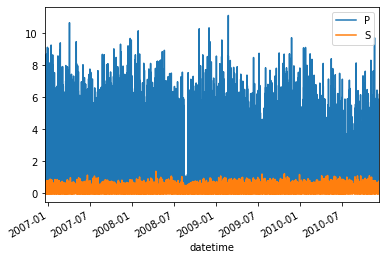

In [87]:
data[["P", "S"]].plot()

We have too much data to sensibly plot on one figure. Let's see how we can easily select part of the data or aggregate the data to other time resolutions in the next sections.

## Selecting data from a time series

We can use label based indexing on a timeseries as expected:

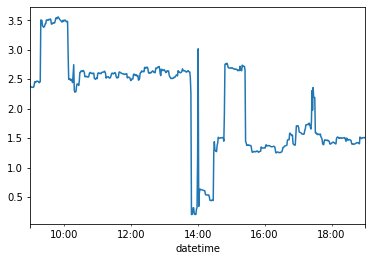

In [83]:
data[pd.Timestamp("2007-01-01 09:00"):pd.Timestamp("2007-01-01 19:00")]["P"].plot()

But, for convenience, indexing a time series also works with strings:

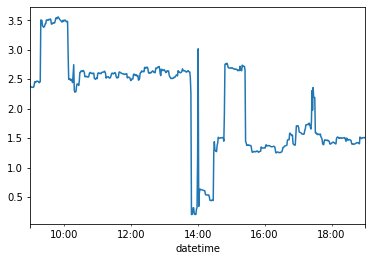

In [84]:
data["2007-01-01 09:00":"2007-01-01 19:00"]['P'].plot()

A nice feature is **"partial string" indexing**, where we can do implicit slicing by providing a partial datetime string.

E.g. all data of 2006:

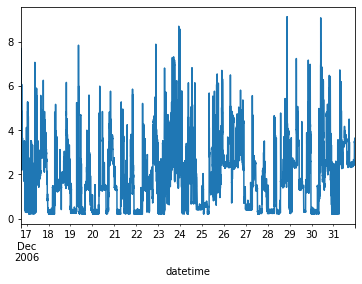

In [86]:
data['2006']["P"].plot()

Or all data of January up to March 2007:

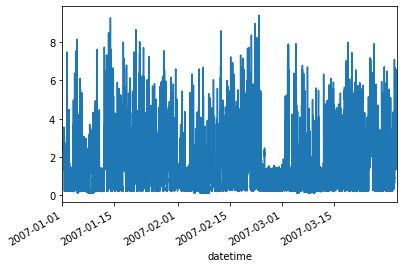

In [88]:
data['2007-01':'2007-03']["P"].plot()

<div class="alert alert-success">

<b>Activity</b>:

 <ul>
  <li>select all data in January for all different years</li>
</ul>
</div>

In [90]:
data[data.index.month == 1]

,P,S,V,I,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2007-01-01 00:00:00,2.580,0.136,241.97,10.6,0.0,0.000,0.0
2007-01-01 00:01:00,2.552,0.100,241.75,10.4,0.0,0.000,0.0
2007-01-01 00:02:00,2.550,0.100,241.64,10.4,0.0,0.000,0.0
2007-01-01 00:03:00,2.550,0.100,241.71,10.4,0.0,0.000,0.0
2007-01-01 00:04:00,2.554,0.100,241.98,10.4,0.0,0.000,0.0
2007-01-01 00:05:00,2.550,0.100,241.83,10.4,0.0,0.000,0.0
2007-01-01 00:06:00,2.534,0.096,241.07,10.4,0.0,0.000,0.0
2007-01-01 00:07:00,2.484,0.000,241.29,10.2,0.0,0.000,0.0
2007-01-01 00:08:00,2.468,0.000,241.23,10.2,0.0,0.000,0.0


<div class="alert alert-success">

<b>Activity</b>:

 <ul>
  <li>select all data in April, May and June for all different years</li>
</ul>
</div>

In [91]:
data[data.index.month.isin([4, 5, 6])]

,P,S,V,I,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2007-04-01 00:00:00,0.850,0.046,242.61,3.6,0.0,0.000,0.0
2007-04-01 00:01:00,0.742,0.000,242.57,3.2,0.0,0.000,0.0
2007-04-01 00:02:00,0.906,0.000,243.35,3.8,0.0,0.000,0.0
2007-04-01 00:03:00,0.606,0.046,243.16,2.6,0.0,0.000,0.0
2007-04-01 00:04:00,0.538,0.046,243.29,2.2,0.0,0.000,0.0
2007-04-01 00:05:00,0.522,0.000,242.56,2.2,0.0,0.000,0.0
2007-04-01 00:06:00,0.550,0.000,243.01,2.2,0.0,0.000,0.0
2007-04-01 00:07:00,0.782,0.124,243.03,3.2,0.0,0.000,0.0
2007-04-01 00:08:00,1.486,0.138,241.64,6.2,0.0,0.000,0.0


<div class="alert alert-success">

<b>Activity</b>:

 <ul>
  <li>select all 'daytime' data (between 12h and 15h) for all days</li>
</ul>
</div>

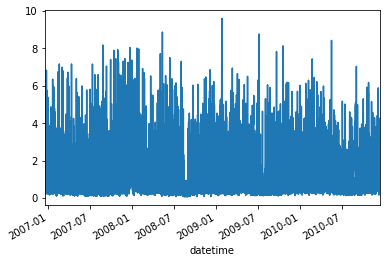

In [92]:
data[(data.index.hour > 12) & (data.index.hour < 15)]['P'].plot()

## The power of pandas: `resample`

A very powerfull method is **`resample`: converting the frequency of the time series** (e.g. from hourly to daily data).

The time series has a frequency of 1 hour. I want to change this to daily:

In [93]:
data.resample('D').mean().head()

,P,S,V,I,Sub_metering_1,Sub_metering_3
datetime,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,12.439394
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,9.264583
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,9.734722
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,4.303472
2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,9.765972


<div class="alert alert-info">
<b>REMEMBER</b>: <br><br>

The string to specify the new time frequency: http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases <br><br>

These strings can also be combined with numbers, eg `'10D'`...

</div>



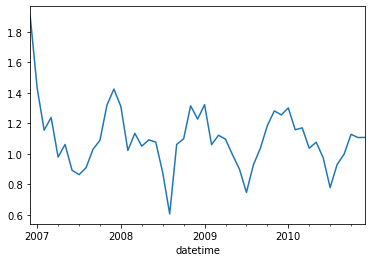

In [94]:
data['P'].resample('M').mean().plot() 

<div class="alert alert-success">

<b>Activity</b>:

 <ul>
  <li>plot the monthly mean and median values for the years 2008-2010 for current <br><br></li>
</ul>
    
**Note** <br>You can create a new figure with `fig, ax = plt.subplots()` and add each of the plots to the created `ax` object (see documentation of pandas plot function)
</div>

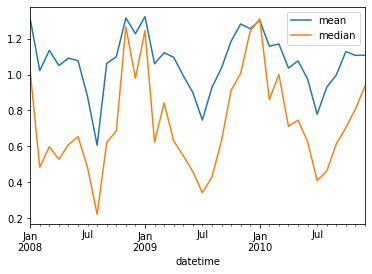

In [98]:
subset = data['2008':'2010']['P']
fig, ax = plt.subplots()
subset.resample('M').mean().plot(ax=ax)
subset.resample('M').median().plot(ax=ax)
ax.legend(["mean", "median"])

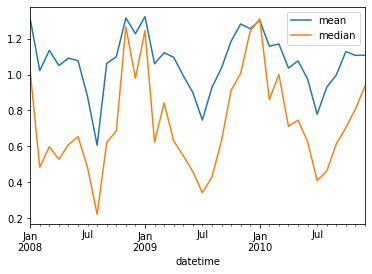

In [99]:
subset.resample('M').agg(['mean', 'median']).plot()

<div class="alert alert-success">

<b>Activity</b>:

 <ul>
  <li>plot the monthly mininum and maximum daily average voltage column</li>
</ul>
</div>

In [103]:
daily = data['V'].resample('D').mean() # daily averages calculated

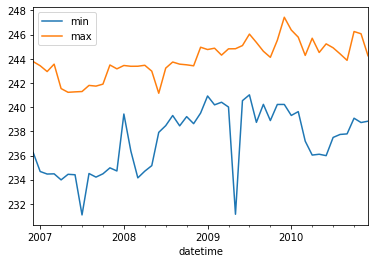

In [104]:
daily.resample('M').agg(['min', 'max']).plot() # monthly minimum and maximum values of these daily averages